In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define data points
X_positive = np.array([[-2, 9], [3, 14], [4, 4], [8, -6], [12, -4], [13, 11]])
X_negative = np.array([[-11, 8], [-8, -3], [-6, 4], [-2, -10], [2, -15], [6, -14]])
y_positive = np.ones(X_positive.shape[0])
y_negative = -np.ones(X_negative.shape[0])

# Combine data and labels
X = np.vstack((X_positive, X_negative))
y = np.hstack((y_positive, y_negative))

# Number of samples and dimensions
n_samples, n_features = X.shape

# Define QP problem components
Q = np.zeros((n_features + 1, n_features + 1))
Q[1:, 1:] = np.eye(n_features)  # Regularization for weights
p = np.zeros(n_features + 1)

# Constraint matrices
A = np.zeros((n_samples, n_features + 1))
A[:, 0] = y  # b coefficient
A[:, 1:] = (y[:, np.newaxis] * X)  # w coefficients
c = np.ones(n_samples)

Q, A, p, c 

(array([[0., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]),
 array([[ 1., -2.,  9.],
        [ 1.,  3., 14.],
        [ 1.,  4.,  4.],
        [ 1.,  8., -6.],
        [ 1., 12., -4.],
        [ 1., 13., 11.],
        [-1., 11., -8.],
        [-1.,  8.,  3.],
        [-1.,  6., -4.],
        [-1.,  2., 10.],
        [-1., -2., 15.],
        [-1., -6., 14.]]),
 array([0., 0., 0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [2]:
# Define objective and constraints for optimization
def objective(u):
    return 0.5 * u.T @ Q @ u

def constraint(i):
    return lambda u: A[i] @ u - c[i]

constraints = [{'type': 'ineq', 'fun': constraint(i)} for i in range(n_samples)]

# Initial guess
u0 = np.zeros(n_features + 1)

# Solve QP problem
solution = minimize(objective, u0, constraints=constraints)
u_opt = solution.x
b_opt, w_opt = u_opt[0], u_opt[1:]

b_opt, w_opt

(np.float64(-0.09090909090909106), array([0.27272727, 0.18181818]))

In [3]:
# Calculate margin width
margin_width = 2 / np.linalg.norm(w_opt)

# Identify support vectors
decision_values = y * (X @ w_opt + b_opt)
support_vectors = X[np.isclose(decision_values, 1)]

margin_width, support_vectors

(np.float64(6.101702158477521),
 array([[ -2,   9],
        [  8,  -6],
        [ -6,   4],
        [  6, -14]]))

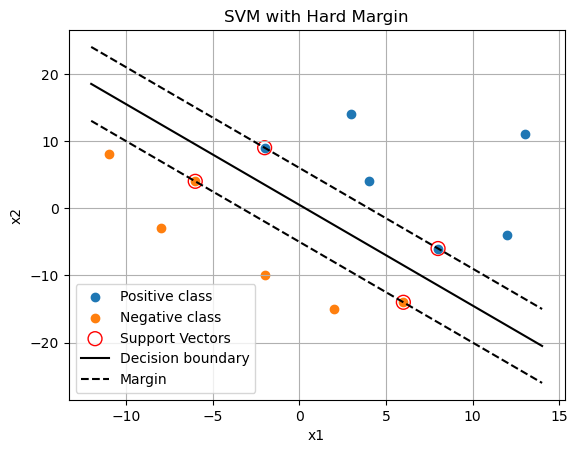

In [4]:
# Plot data and margin
plt.scatter(X_positive[:, 0], X_positive[:, 1], label="Positive class", marker='o')
plt.scatter(X_negative[:, 0], X_negative[:, 1], label="Negative class", marker='o')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='r', label="Support Vectors")

# Plot decision boundary and margins
x_range = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 200)
y_decision = -(w_opt[0] * x_range + b_opt) / w_opt[1]
y_margin1 = y_decision + 1 / w_opt[1]
y_margin2 = y_decision - 1 / w_opt[1]
plt.plot(x_range, y_decision, 'k-', label="Decision boundary")
plt.plot(x_range, y_margin1, 'k--', label="Margin")
plt.plot(x_range, y_margin2, 'k--')

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("SVM with Hard Margin")
plt.grid()
plt.show()
